In [1]:
# Gerekli kütüphaneler
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv('ilan_bilgileri_test.csv')

# İlk 5 satırı göster
print(df.head())

# Şekil (satır, sütun) bilgisini göster
print(f"\nVeri şekli: {df.shape}")

# Sütun bilgileri ve veri tiplerini göster
print("\nVeri tipi bilgileri:")
print(df.info())


      Fiyat                                              Konum  İlan Numarası  \
0  20.000TL             İstanbul - Pendik - Esenyalı Mahallesi       17533328   
1  22.000TL  İstanbul - Esenyurt - Mehmet Akif Ersoy Mahallesi       17518842   
2  28.000TL             İstanbul - Pendik - Esenyalı Mahallesi       17513222   
3  17.000TL         İstanbul - Silivri - Mimar Sinan Mahallesi       17507265   
4  26.000TL          İstanbul - Bahçelievler - Zafer Mahallesi       17481030   

  İlan Oluşturma Tarihi İlan Güncelleme Tarihi   Türü Kategorisi   Tipi  \
0       23 Haziran 2025        23 Haziran 2025  Konut    Kiralık  Daire   
1       20 Haziran 2025        20 Haziran 2025  Konut    Kiralık  Daire   
2       19 Haziran 2025        19 Haziran 2025  Konut    Kiralık  Daire   
3       18 Haziran 2025        21 Haziran 2025  Konut    Kiralık  Daire   
4       13 Haziran 2025        23 Haziran 2025  Konut    Kiralık  Daire   

  Net Metrekare Brüt Metrekare  ... Takas Balkon Durumu Balkon

In [2]:
# Kolon isimlerini listele
print("Tüm sütunlar:")
for col in df.columns:
    print(col)


Tüm sütunlar:
Fiyat
Konum
İlan Numarası
İlan Oluşturma Tarihi
İlan Güncelleme Tarihi
Türü
Kategorisi
Tipi
Net Metrekare
Brüt Metrekare
Oda Sayısı
Binanın Yaşı
Bulunduğu Kat
Binanın Kat Sayısı
Isıtma Tipi
Kullanım Durumu
Tapu Durumu
Site İçerisinde
Banyo Sayısı
Fiyat Durumu
Ada
Parsel
Depozito
Yapı Durumu
Yapı Tipi
Eşya Durumu
Aidat
Takas
Balkon Durumu
Balkon Sayısı
Balkon Tipi
WC Sayısı
Görüntülü Gezilebilir mi?
Banyo Metrekare
Balkon Metrekare
Salon Metrekare
WC Metrekare


In [3]:
# Eksik veri yüzdesini hesapla
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)

# Her kolonun unique değer sayısı
unique_counts = df.nunique().sort_values(ascending=False)

# Ekrana yazdır
print("Eksik veri yüzdesi (%):")
print(missing_percent)

print("\nKolonların unique değer sayısı:")
print(unique_counts)


Eksik veri yüzdesi (%):
WC Metrekare                 95.325543
Salon Metrekare              94.323873
Balkon Metrekare             94.156928
Banyo Metrekare              92.988314
Görüntülü Gezilebilir mi?    82.971619
Balkon Tipi                  82.971619
Balkon Sayısı                79.966611
Yapı Tipi                    79.966611
WC Sayısı                    78.464107
Aidat                        78.297162
Yapı Durumu                  76.794658
Balkon Durumu                67.278798
Ada                          62.270451
Depozito                     62.103506
Parsel                       56.594324
Takas                        45.909850
Eşya Durumu                  36.894825
Bulunduğu Kat                 2.170284
Fiyat Durumu                  0.000000
Fiyat                         0.000000
Konum                         0.000000
Net Metrekare                 0.000000
İlan Numarası                 0.000000
İlan Oluşturma Tarihi         0.000000
İlan Güncelleme Tarihi        0.000000
T

In [4]:
# Atılacak kolonları listeleyelim
drop_cols = [
    'İlan Numarası',
    'Ada',
    'Parsel',
    'İlan Oluşturma Tarihi',
    'İlan Güncelleme Tarihi',
    'WC Metrekare',
    'Salon Metrekare',
    'Balkon Metrekare',
    'Banyo Metrekare',
    'Görüntülü Gezilebilir mi?',
    'Balkon Tipi',
    'Balkon Sayısı',
    'Yapı Tipi',
    'WC Sayısı',
    'Balkon Durumu'
]
#aidat ve yapı durumu etkisi olduğunu düşündüğüm için bıraktım devamında feature selection kısmında tekrar değerlendirilecek


df_clean = df.drop(columns=drop_cols)

# Yeni veri setine bakalım
print(f"Kalan kolon sayısı: {df_clean.shape[1]}")
print("\nKalan kolonlar:")
print(df_clean.columns.tolist())


Kalan kolon sayısı: 22

Kalan kolonlar:
['Fiyat', 'Konum', 'Türü', 'Kategorisi', 'Tipi', 'Net Metrekare', 'Brüt Metrekare', 'Oda Sayısı', 'Binanın Yaşı', 'Bulunduğu Kat', 'Binanın Kat Sayısı', 'Isıtma Tipi', 'Kullanım Durumu', 'Tapu Durumu', 'Site İçerisinde', 'Banyo Sayısı', 'Fiyat Durumu', 'Depozito', 'Yapı Durumu', 'Eşya Durumu', 'Aidat', 'Takas']


In [5]:
# Fiyat kolonunu temizleyelim (ör: "20.000TL" -> 20000)
df_clean['Fiyat'] = df_clean['Fiyat'].str.replace('.', '').str.replace('TL', '').str.strip().astype(float)

# Net Metrekare (ör: "100 m²" -> 100)
df_clean['Net Metrekare'] = df_clean['Net Metrekare'].str.replace('m²', '').str.strip().astype(float)

# Brüt Metrekare (ör: "120 m²" -> 120)
df_clean['Brüt Metrekare'] = df_clean['Brüt Metrekare'].str.replace('m²', '').str.strip().astype(float)

# Kontrol edelim
print(df_clean[['Fiyat', 'Net Metrekare', 'Brüt Metrekare']].head())


     Fiyat  Net Metrekare  Brüt Metrekare
0  20000.0          100.0           110.0
1  22000.0           90.0           100.0
2  28000.0          110.0           130.0
3  17000.0           72.0            92.0
4  26000.0           75.0            80.0


In [6]:
# Fiyat kolonunu temizle
df_clean['Fiyat'] = df_clean['Fiyat'].astype(str).str.replace('.', '', regex=False).str.replace('TL', '', regex=False).str.strip().astype(float)

# Net Metrekare
df_clean['Net Metrekare'] = df_clean['Net Metrekare'].astype(str).str.replace('m²', '', regex=False).str.strip().astype(float)

# Brüt Metrekare
df_clean['Brüt Metrekare'] = df_clean['Brüt Metrekare'].astype(str).str.replace('m²', '', regex=False).str.strip().astype(float)

# Kontrol
print(df_clean[['Fiyat', 'Net Metrekare', 'Brüt Metrekare']].head())


      Fiyat  Net Metrekare  Brüt Metrekare
0  200000.0          100.0           110.0
1  220000.0           90.0           100.0
2  280000.0          110.0           130.0
3  170000.0           72.0            92.0
4  260000.0           75.0            80.0


In [7]:
# Oda + Salon ayır
oda_salon = df_clean['Oda Sayısı'].astype(str).str.extract(r'(\d+)\s*\+\s*(\d+)')
df_clean['Oda_Sayisi'] = oda_salon[0].astype(float)
df_clean['Salon_Sayisi'] = oda_salon[1].astype(float)

# Eski kolon düş
df_clean = df_clean.drop(columns=['Oda Sayısı'])

# Kontrol → ilk 5 satır
print(df_clean[['Oda_Sayisi', 'Salon_Sayisi']].head())


   Oda_Sayisi  Salon_Sayisi
0         2.0           1.0
1         2.0           1.0
2         3.0           1.0
3         2.0           1.0
4         2.0           1.0


In [8]:
print(df_clean.columns.tolist())
print(f"Kalan kolon sayısı: {df_clean.shape[1]}")
print("\nKalan kolonlar:")

['Fiyat', 'Konum', 'Türü', 'Kategorisi', 'Tipi', 'Net Metrekare', 'Brüt Metrekare', 'Binanın Yaşı', 'Bulunduğu Kat', 'Binanın Kat Sayısı', 'Isıtma Tipi', 'Kullanım Durumu', 'Tapu Durumu', 'Site İçerisinde', 'Banyo Sayısı', 'Fiyat Durumu', 'Depozito', 'Yapı Durumu', 'Eşya Durumu', 'Aidat', 'Takas', 'Oda_Sayisi', 'Salon_Sayisi']
Kalan kolon sayısı: 23

Kalan kolonlar:


In [9]:
# Binanın Yaşı kolonunu dönüştür
df_clean['Binanın Yaşı'] = df_clean['Binanın Yaşı'].astype(str)
df_clean['Bina_Yasi_Num'] = df_clean['Binanın Yaşı'].apply(
    lambda x: 0 if 'Sıfır' in x 
    else 21 if '21' in x 
    else pd.to_numeric(x, errors='coerce')
)

# Eski kolon düş
df_clean = df_clean.drop(columns=['Binanın Yaşı'])

# Kontrol
print(df_clean[['Bina_Yasi_Num']].head())



   Bina_Yasi_Num
0           21.0
1            NaN
2           21.0
3            4.0
4            NaN


In [10]:
# Tüm kolon isimlerini göster
print(df_clean.columns.tolist())


['Fiyat', 'Konum', 'Türü', 'Kategorisi', 'Tipi', 'Net Metrekare', 'Brüt Metrekare', 'Bulunduğu Kat', 'Binanın Kat Sayısı', 'Isıtma Tipi', 'Kullanım Durumu', 'Tapu Durumu', 'Site İçerisinde', 'Banyo Sayısı', 'Fiyat Durumu', 'Depozito', 'Yapı Durumu', 'Eşya Durumu', 'Aidat', 'Takas', 'Oda_Sayisi', 'Salon_Sayisi', 'Bina_Yasi_Num']


In [11]:
# Kaç tane eksik var?
nan_count = df_clean['Bina_Yasi_Num'].isnull().sum()
total_rows = df_clean.shape[0]
nan_percent = (nan_count / total_rows) * 100

print(f"Binanın Yaşı --> Eksik değer sayısı: {nan_count} ({nan_percent:.2f}%)")


Binanın Yaşı --> Eksik değer sayısı: 333 (55.59%)


In [12]:
# Eksik yaşlara -1 verelim
df_clean['Bina_Yasi_Num'] = df_clean['Bina_Yasi_Num'].fillna(-1)

# Kontrol
print(df_clean['Bina_Yasi_Num'].value_counts())


Bina_Yasi_Num
-1.0     333
 21.0    202
 4.0      32
 3.0      12
 1.0      11
 2.0       9
Name: count, dtype: int64


In [13]:
# Tüm kolonlarda eksik veri yüzdesi
missing_percent = df_clean.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Eksik veri yüzdesi olan kolonlar:")
print(missing_percent)


Eksik veri yüzdesi olan kolonlar:
Aidat            78.297162
Yapı Durumu      76.794658
Depozito         62.103506
Takas            45.909850
Eşya Durumu      36.894825
Oda_Sayisi        3.338898
Salon_Sayisi      3.338898
Bulunduğu Kat     2.170284
dtype: float64


In [14]:
# Binanın Kat Sayısı → numerik
df_clean['Binanın Kat Sayısı'] = df_clean['Binanın Kat Sayısı'].astype(str).str.replace('Kat', '').str.strip()
df_clean['Binanın Kat Sayısı'] = df_clean['Binanın Kat Sayısı'].replace('Giriş', '0').replace('Yüksek Giriş', '1')
df_clean['Binanın Kat Sayısı'] = pd.to_numeric(df_clean['Binanın Kat Sayısı'], errors='coerce')

# Banyo Sayısı → numerik
df_clean['Banyo Sayısı'] = df_clean['Banyo Sayısı'].astype(str).str.strip()
df_clean['Banyo Sayısı'] = pd.to_numeric(df_clean['Banyo Sayısı'], errors='coerce')

# Depozito → TL temizleme
df_clean['Depozito'] = df_clean['Depozito'].astype(str).str.replace('.', '', regex=False).str.replace('TL', '', regex=False).str.strip()
df_clean['Depozito'] = pd.to_numeric(df_clean['Depozito'], errors='coerce')

# Aidat → TL temizleme
df_clean['Aidat'] = df_clean['Aidat'].astype(str).str.replace('.', '', regex=False).str.replace('TL', '', regex=False).str.strip()
df_clean['Aidat'] = pd.to_numeric(df_clean['Aidat'], errors='coerce')

# Kontrol
print(df_clean[['Binanın Kat Sayısı', 'Banyo Sayısı', 'Depozito', 'Aidat']].head())


   Binanın Kat Sayısı  Banyo Sayısı  Depozito   Aidat
0                   2           1.0       NaN     NaN
1                   5           1.0   44000.0     NaN
2                   2           1.0       NaN     NaN
3                   7           1.0   17000.0  1950.0
4                   4           1.0   35000.0   250.0


In [15]:
# Takas → 0-1
df_clean['Takas'] = df_clean['Takas'].map({'Var': 1, 'Yok': 0})

# Site İçerisinde → 0-1
df_clean['Site İçerisinde'] = df_clean['Site İçerisinde'].map({'Evet': 1, 'Hayır': 0})

# Kontrol
print(df_clean[['Takas', 'Site İçerisinde']].head())


   Takas  Site İçerisinde
0    NaN                0
1    NaN                0
2    NaN                0
3    0.0                1
4    NaN                0


In [16]:
# Takas → 0-1 → eksikler "Yok" (0) sayılacak
df_clean['Takas'] = df_clean['Takas'].map({'Var': 1, 'Yok': 0})
df_clean['Takas'] = df_clean['Takas'].fillna(0)

# Site İçerisinde → 0-1 → eksik yok zaten ama garanti için:
df_clean['Site İçerisinde'] = df_clean['Site İçerisinde'].fillna(0)

# Kontrol
print(df_clean[['Takas', 'Site İçerisinde']].head())


   Takas  Site İçerisinde
0    0.0                0
1    0.0                0
2    0.0                0
3    0.0                1
4    0.0                0


In [17]:
# Object tipinde kalan kolonları gösterelim
object_cols = df_clean.select_dtypes(include='object').columns.tolist()

print("Kategorik (object) kalan kolonlar:")
print(object_cols)


Kategorik (object) kalan kolonlar:
['Konum', 'Türü', 'Kategorisi', 'Tipi', 'Bulunduğu Kat', 'Isıtma Tipi', 'Kullanım Durumu', 'Tapu Durumu', 'Fiyat Durumu', 'Yapı Durumu', 'Eşya Durumu']


In [18]:
print("Türü kolonunda unique değerler:")
print(df_clean['Türü'].value_counts())

print("\nKategorisi kolonunda unique değerler:")
print(df_clean['Kategorisi'].value_counts())


Türü kolonunda unique değerler:
Türü
Konut    599
Name: count, dtype: int64

Kategorisi kolonunda unique değerler:
Kategorisi
Kiralık    599
Name: count, dtype: int64


In [19]:
# Sabit kolonları silelim
df_clean = df_clean.drop(columns=['Türü', 'Kategorisi'])

# Kontrol → kaç kolon kaldı?
print(f"Kalan kolon sayısı: {df_clean.shape[1]}")


Kalan kolon sayısı: 21


In [20]:
# Eksik olan kategorik kolonlara "Bilinmiyor" etiketi atalım

df_clean['Yapı Durumu'] = df_clean['Yapı Durumu'].fillna('Bilinmiyor')
df_clean['Eşya Durumu'] = df_clean['Eşya Durumu'].fillna('Bilinmiyor')

# Kontrol
print(df_clean[['Yapı Durumu', 'Eşya Durumu']].head())


  Yapı Durumu Eşya Durumu
0  Bilinmiyor  Bilinmiyor
1  Bilinmiyor  Bilinmiyor
2  Bilinmiyor  Bilinmiyor
3   İkinci El         Boş
4  Bilinmiyor      Eşyalı


In [21]:
# One-hot encoding yapılacak kolon listesi
one_hot_cols = [
    'Konum', 'Tipi', 'Bulunduğu Kat', 'Isıtma Tipi',
    'Kullanım Durumu', 'Tapu Durumu', 'Fiyat Durumu',
    'Yapı Durumu', 'Eşya Durumu'
]

# One-hot encoding
df_clean = pd.get_dummies(df_clean, columns=one_hot_cols, drop_first=True)

# Kontrol → yeni shape
print(f"Yeni kolon sayısı: {df_clean.shape[1]}")


Yeni kolon sayısı: 383


In [22]:
# X ve y ayır
X = df_clean.drop(columns=['Fiyat'])
y = df_clean['Fiyat']

# Kontrol
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (599, 382)
y shape: (599,)


In [23]:
# Tüm kolonlarda eksik veri yüzdesi
missing_percent = X.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Eksik veri yüzdesi olan kolonlar (X için):")
print(missing_percent)


Eksik veri yüzdesi olan kolonlar (X için):
Aidat           78.297162
Depozito        62.103506
Oda_Sayisi       3.338898
Salon_Sayisi     3.338898
Banyo Sayısı     0.500835
dtype: float64


In [24]:
# Aidat → 0
X['Aidat'] = X['Aidat'].fillna(0)

# Depozito → 0
X['Depozito'] = X['Depozito'].fillna(0)

# Oda_Sayisi → median
X['Oda_Sayisi'] = X['Oda_Sayisi'].fillna(X['Oda_Sayisi'].median())

# Salon_Sayisi → median
X['Salon_Sayisi'] = X['Salon_Sayisi'].fillna(X['Salon_Sayisi'].median())

# Banyo Sayısı → median
X['Banyo Sayısı'] = X['Banyo Sayısı'].fillna(X['Banyo Sayısı'].median())

# Kontrol → hala NaN var mı?
print("Kalan NaN:", X.isnull().sum().sum())


Kalan NaN: 0


In [25]:
# Model kütüphaneleri
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Veriyi train-test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli kur
model = LinearRegression()

# Eğit
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)

# Skorlar
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R2 Score: 0.2497
RMSE: 181594.17
MAE: 114372.52


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler

def algo_test(x, y):
    # Bütün modelleri tanımlıyorum
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    sgd = SGDRegressor()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    kn = KNeighborsRegressor()
    rkn = RadiusNeighborsRegressor(radius=1.0)
    ada = AdaBoostRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()
    svr = SVR()
    mlp_regressor = MLPRegressor()

    algos = [L, R, Lass, E, sgd, ETR, GBR, ada, kn, dt, xgb, svr, mlp_regressor]
    algo_names = ['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                  'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    r_squared = []
    rmse = []
    mae = []

    # Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
    result = pd.DataFrame(columns=['R_Squared','RMSE','MAE'], index=algo_names)

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))
        rmse.append(mean_squared_error(y_test, p) ** 0.5)
        mae.append(mean_absolute_error(y_test, p))

    # result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae

    # oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
    rtable = result.sort_values('R_Squared', ascending=False)
    return rtable


In [27]:

# Sonuçları en okunur haliyle yazdıralım
pd.options.display.float_format = '{:,.4f}'.format

result_table = algo_test(X, y)

# Sadece ilk 7 model gösterelim (en iyi modeller)
print("\n=== EN İYİ MODELLER (Top 7) ===\n")
print(result_table.head(7))



  File "C:\Users\PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



=== EN İYİ MODELLER (Top 7) ===

                   R_Squared         RMSE          MAE
Ridge                 0.6307 127,403.8005  92,207.0290
AdaBoost              0.5236 144,690.5462  90,617.4667
ElasticNet            0.5204 145,175.8230 103,088.0721
Gradient Boosting     0.5149 146,015.8119  90,874.7510
XGBRegressor          0.4511 155,315.4348  88,217.1917
Lasso                 0.3160 173,375.1430 106,635.5415
Linear                0.2497 181,594.1689 114,372.5168


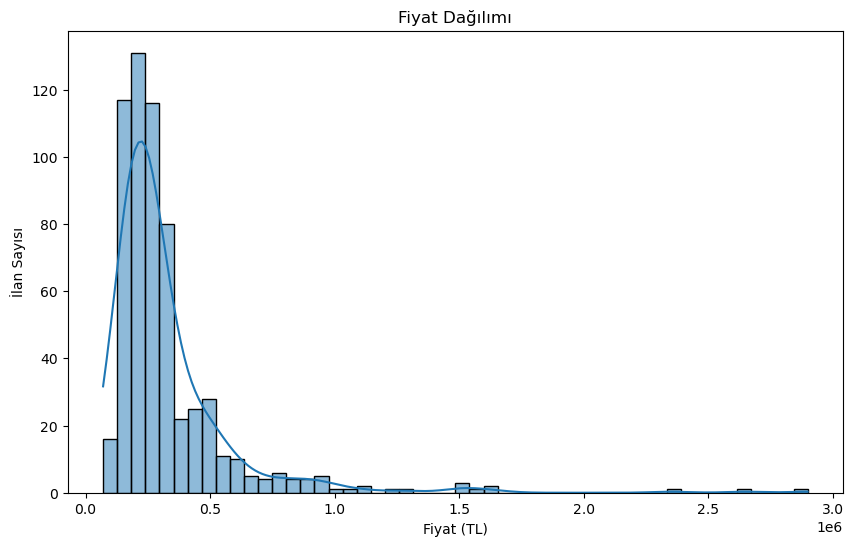

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(y, bins=50, kde=True)
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat (TL)")
plt.ylabel("İlan Sayısı")
plt.show()


In [29]:
# IQR yöntemi → sadece bilgi için
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

# Kaç outlier var?
num_outliers = (y >= upper_limit).sum()
percent_outliers = (num_outliers / y.shape[0]) * 100

print(f"IQR üst limiti: {upper_limit:.0f} TL")
print(f"Outlier sayısı: {num_outliers} ilan (%{percent_outliers:.2f})")
print(f"Kalan veri: {y.shape[0] - num_outliers} ilan")


IQR üst limiti: 590000 TL
Outlier sayısı: 51 ilan (%8.51)
Kalan veri: 548 ilan


In [30]:
# Outlier olmayanları filtrele
mask = y < upper_limit

X_filtered = X[mask]
y_filtered = y[mask]

print(f"Kalan veri sayısı: {X_filtered.shape[0]} satır")


Kalan veri sayısı: 548 satır


In [31]:
# Numerik kolonları al
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Sonuçları tutmak için liste
outlier_summary = []

# Her kolon için IQR yöntemi ile outlier sayısı hesapla
for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    num_outliers = (X[col] > upper_limit).sum()
    percent_outliers = (num_outliers / X.shape[0]) * 100
    
    outlier_summary.append([col, num_outliers, f"{percent_outliers:.2f}%"])

# DataFrame yap
outlier_df = pd.DataFrame(outlier_summary, columns=['Kolon', 'Outlier Sayısı', 'Outlier %'])

# Outlier sayısına göre sırala
outlier_df = outlier_df.sort_values('Outlier Sayısı', ascending=False)

# Göster
outlier_df


,Kolon,Outlier Sayısı,Outlier %
3,Site İçerisinde,142,23.71%
4,Banyo Sayısı,116,19.37%
6,Aidat,112,18.70%
2,Binanın Kat Sayısı,104,17.36%
0,Net Metrekare,26,4.34%
1,Brüt Metrekare,23,3.84%
5,Depozito,23,3.84%
9,Salon_Sayisi,18,3.01%
8,Oda_Sayisi,17,2.84%
7,Takas,0,0.00%


In [32]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

# Uygula örnek olarak Aidat ve Binanın Kat Sayısı
cap_outliers(X, 'Aidat')
cap_outliers(X, 'Binanın Kat Sayısı')
cap_outliers(X, 'Banyo Sayısı')
# İstersen diğerlerine de uygula


In [33]:
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    return df

num_cols = ['Aidat', 'Depozito', 'Banyo Sayısı', 'Binanın Kat Sayısı', 'Net Metrekare', 'Brüt Metrekare', 'Oda_Sayisi', 'Salon_Sayisi']

X_capped = cap_outliers(X.copy(), num_cols)


In [34]:
# Outlier sayısına göre sırala
outlier_df = outlier_df.sort_values('Outlier Sayısı', ascending=False)

# Göster
outlier_df

,Kolon,Outlier Sayısı,Outlier %
3,Site İçerisinde,142,23.71%
4,Banyo Sayısı,116,19.37%
6,Aidat,112,18.70%
2,Binanın Kat Sayısı,104,17.36%
0,Net Metrekare,26,4.34%
1,Brüt Metrekare,23,3.84%
5,Depozito,23,3.84%
9,Salon_Sayisi,18,3.01%
8,Oda_Sayisi,17,2.84%
7,Takas,0,0.00%


In [35]:
# Eksik değer doldurma işlemleri

# Site İçerisinde kolonundaki NaN değerleri 0 yapalım
X_capped['Site İçerisinde'] = X_capped['Site İçerisinde'].fillna(0)

# Sayısal kolonların NaN değerlerini medyan ile dolduralım
numeric_cols = ['Net Metrekare', 'Brüt Metrekare', 'Depozito', 'Salon_Sayisi', 'Oda_Sayisi']
for col in numeric_cols:
    X_capped[col] = X_capped[col].fillna(X_capped[col].median())

# Eksik değerlerin kontrolü
print("Eksik değerlerin sayısı (kolon bazında):")
print(X_capped.isnull().sum())


Eksik değerlerin sayısı (kolon bazında):
Net Metrekare               0
Brüt Metrekare              0
Binanın Kat Sayısı          0
Site İçerisinde             0
Banyo Sayısı                0
                           ..
Fiyat Durumu_Genel Fiyat    0
Yapı Durumu_Sıfır           0
Yapı Durumu_İkinci El       0
Eşya Durumu_Boş             0
Eşya Durumu_Eşyalı          0
Length: 382, dtype: int64


In [36]:
# Numerik kolonlar listesi
num_cols = ['Aidat', 'Depozito', 'Banyo Sayısı', 'Binanın Kat Sayısı', 'Net Metrekare', 'Brüt Metrekare', 'Oda_Sayisi', 'Salon_Sayisi']

outlier_summary = []

for col in num_cols:
    Q1 = X_capped[col].quantile(0.25)
    Q3 = X_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    num_outliers = (X_capped[col] > upper_limit).sum()
    percent_outliers = (num_outliers / X_capped.shape[0]) * 100
    
    outlier_summary.append([col, num_outliers, f"{percent_outliers:.2f}%"])

outlier_df = pd.DataFrame(outlier_summary, columns=['Kolon', 'Outlier Sayısı', 'Outlier %'])
outlier_df = outlier_df.sort_values('Outlier Sayısı', ascending=False)

print(outlier_df)


                Kolon  Outlier Sayısı Outlier %
0               Aidat               0     0.00%
1            Depozito               0     0.00%
2        Banyo Sayısı               0     0.00%
3  Binanın Kat Sayısı               0     0.00%
4       Net Metrekare               0     0.00%
5      Brüt Metrekare               0     0.00%
6          Oda_Sayisi               0     0.00%
7        Salon_Sayisi               0     0.00%


In [37]:
result_table = algo_test(X_capped, y)
print(result_table)


                                               R_Squared  \
Ridge                                             0.5130   
Gradient Boosting                                 0.4680   
ElasticNet                                        0.4302   
AdaBoost                                          0.3445   
XGBRegressor                                      0.1794   
Decision Tree                                     0.1370   
Lasso                                             0.1142   
KNeighborsRegressor                              -0.0584   
SVR                                              -0.0600   
Extra Tree                                       -0.1877   
mlp_regressor                                    -1.3435   
Linear                                       -1,801.1282   
SGD                 -28,419,643,726,352,709,844,992.0000   

                                           RMSE                         MAE  
Ridge                              146,299.1917                104,461.9813  
Gra